# 1. Model Training and Evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load PCA and LDA datasets
pca_data = pd.read_csv('/content/pca_result_95variance_11components.csv')
lda_data = pd.read_csv('/content/lda_result_95variance_6components.csv')

target_column = 'LABEL'

# Split features and target for PCA and LDA datasets
X_pca = pca_data.drop(columns=[target_column]).values
y_pca = pca_data[target_column].values
X_lda = lda_data.drop(columns=[target_column]).values
y_lda = lda_data[target_column].values

# Define models to train
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Function to train models with cross-validation and store results
def train_and_evaluate(X, y, dataset_name):
    results = []
    for model_name, model in models.items():
        # Perform 5-fold cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

        # Train/test split for evaluation metrics
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append({
            'Model': f"{dataset_name} + {model_name}",
            'Cross-Validation Accuracy': np.mean(cv_scores),
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        })

    return results

# Train and evaluate models on PCA and LDA datasets
pca_results = train_and_evaluate(X_pca, y_pca, 'PCA')
lda_results = train_and_evaluate(X_lda, y_lda, 'LDA')

# Combine results into a single DataFrame
results_df = pd.DataFrame(pca_results + lda_results)

# Display overall results
print(results_df[['Model', 'Cross-Validation Accuracy', 'Precision', 'Recall', 'F1-Score']])


                       Model  Cross-Validation Accuracy  Precision    Recall  \
0        PCA + Random Forest                   0.874616   0.885298  0.878049   
1                  PCA + KNN                   0.835260   0.892233  0.853659   
2                  PCA + SVM                   0.886902   0.929530  0.902439   
3  PCA + Logistic Regression                   0.869798   0.876118  0.841463   
4        LDA + Random Forest                   0.869708   0.928963  0.914634   
5                  LDA + KNN                   0.869678   0.877846  0.865854   
6                  LDA + SVM                   0.877055   0.829527  0.829268   
7  LDA + Logistic Regression                   0.889341   0.895717  0.878049   

   F1-Score  
0  0.873430  
1  0.854828  
2  0.903746  
3  0.838918  
4  0.912476  
5  0.863384  
6  0.812904  
7  0.873829  


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# 2. Cross Validation for All Models

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

PCA Cross-Validation Results:
                 Model    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  \
0        Random Forest  0.865854  0.914634  0.864198  0.851852  0.876543   
1                  KNN  0.817073  0.902439  0.876543  0.814815  0.765432   
2                  SVM  0.865854  0.939024  0.913580  0.864198  0.851852   
3  Logistic Regression  0.817073  0.914634  0.888889  0.814815  0.913580   

   Mean Accuracy  
0       0.874616  
1       0.835260  
2       0.886902  
3       0.869798  

LDA Cross-Validation Results:
                 Model    Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  \
0        Random Forest  0.878049  0.890244  0.851852  0.790123  0.938272   
1                  KNN  0.853659  0.926829  0.876543  0.814815  0.876543   
2                  SVM  0.878049  0.914634  0.864198  0.827160  0.901235   
3  Logistic Regression  0.902439  0.914634  0.876543  0.864198  0.888889   

   Mean Accuracy  
0       0.869708  
1       0.869678  
2       0.877055  
3     

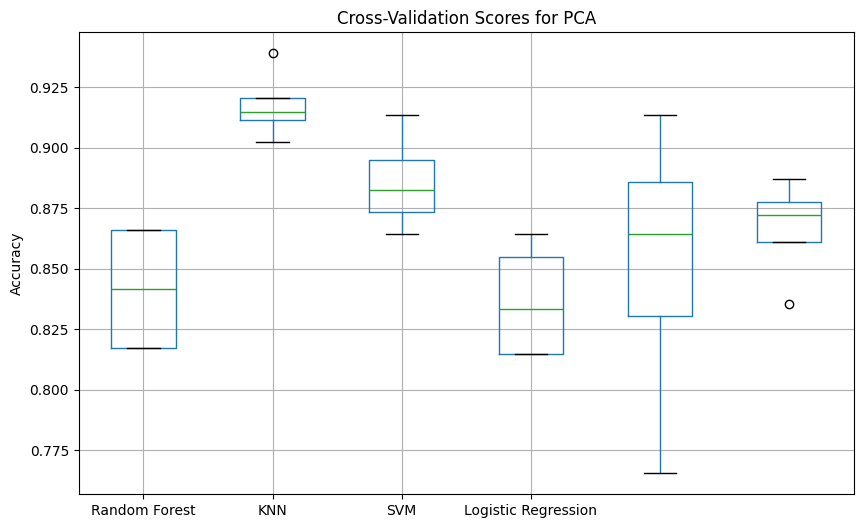

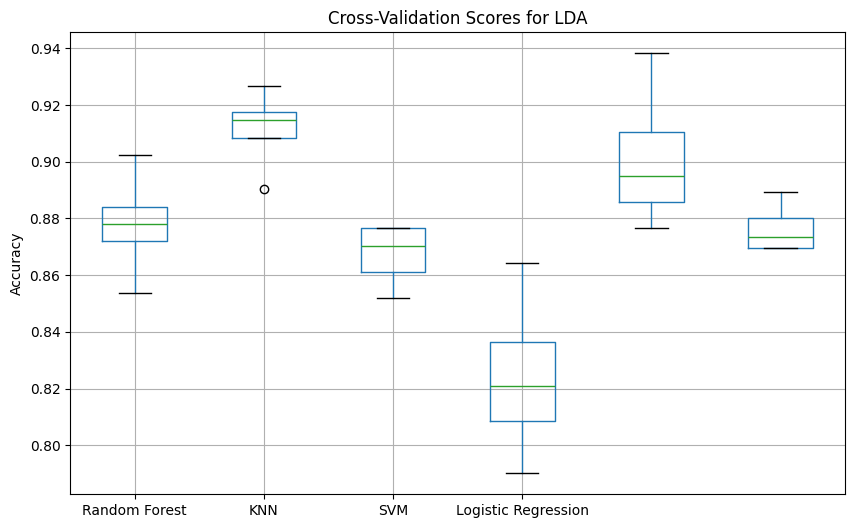

In [3]:
# Function to perform cross-validation
def cross_validation(models, X, y):
    cv_results = {}
    for model_name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        cv_results[model_name] = cv_scores
    return cv_results

# Perform cross-validation for PCA dataset
cv_pca = cross_validation(models, X_pca, y_pca)

# Perform cross-validation for LDA dataset
cv_lda = cross_validation(models, X_lda, y_lda)

# Create a DataFrame for PCA cross-validation results
cv_pca_df = pd.DataFrame({
    'Model': list(cv_pca.keys()),
    'Fold 1': [scores[0] for scores in cv_pca.values()],
    'Fold 2': [scores[1] for scores in cv_pca.values()],
    'Fold 3': [scores[2] for scores in cv_pca.values()],
    'Fold 4': [scores[3] for scores in cv_pca.values()],
    'Fold 5': [scores[4] for scores in cv_pca.values()],
    'Mean Accuracy': [scores.mean() for scores in cv_pca.values()]
})

# Display the PCA cross-validation results table
print("PCA Cross-Validation Results:")
print(cv_pca_df)

# Create a DataFrame for LDA cross-validation results
cv_lda_df = pd.DataFrame({
    'Model': list(cv_lda.keys()),
    'Fold 1': [scores[0] for scores in cv_lda.values()],
    'Fold 2': [scores[1] for scores in cv_lda.values()],
    'Fold 3': [scores[2] for scores in cv_lda.values()],
    'Fold 4': [scores[3] for scores in cv_lda.values()],
    'Fold 5': [scores[4] for scores in cv_lda.values()],
    'Mean Accuracy': [scores.mean() for scores in cv_lda.values()]
})

# Display the LDA cross-validation results table
print("\nLDA Cross-Validation Results:")
print(cv_lda_df)

# Plotting Cross-Validation results for PCA dataset
plt.figure(figsize=(10,6))
cv_pca_df.drop('Model', axis=1).boxplot()
plt.title('Cross-Validation Scores for PCA')
plt.ylabel('Accuracy')
plt.xticks([1, 2, 3, 4], ['Random Forest', 'KNN', 'SVM', 'Logistic Regression'])
plt.show()

# Plotting Cross-Validation results for LDA dataset
plt.figure(figsize=(10,6))
cv_lda_df.drop('Model', axis=1).boxplot()
plt.title('Cross-Validation Scores for LDA')
plt.ylabel('Accuracy')
plt.xticks([1, 2, 3, 4], ['Random Forest', 'KNN', 'SVM', 'Logistic Regression'])
plt.show()


# 3. Benchmarking All Models

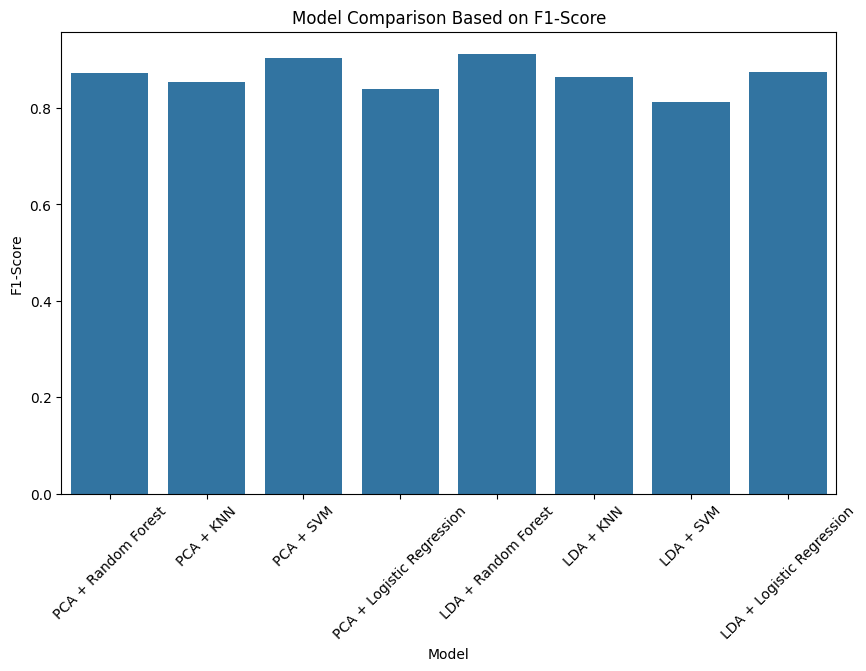


Best Model: LDA + Random Forest
Cross-Validation Accuracy: 0.8697
Precision: 0.9290
Recall: 0.9146
F1-Score: 0.9125
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 6 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


In [4]:
# Evaluate final results, print the best model with details, and visualize
def evaluate_and_plot(results_df):
    # Find the best model based on F1-Score
    best_model_row = results_df.loc[results_df['F1-Score'].idxmax()]
    best_model_name = best_model_row['Model']

    # Benchmarking F1-Score for all models
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='F1-Score', data=results_df)
    plt.title('Model Comparison Based on F1-Score')
    plt.xticks(rotation=45)
    plt.show()

    print(f"\nBest Model: {best_model_name}")
    print(f"Cross-Validation Accuracy: {best_model_row['Cross-Validation Accuracy']:.4f}")
    print(f"Precision: {best_model_row['Precision']:.4f}")
    print(f"Recall: {best_model_row['Recall']:.4f}")
    print(f"F1-Score: {best_model_row['F1-Score']:.4f}")
    print(f"Confusion Matrix:\n{best_model_row['Confusion Matrix']}")

# Call the function
evaluate_and_plot(results_df)


# 4. Hyperparameter Tuning


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy Table:
    Max Depth  Number of Trees (n_estimators)  Accuracy
0        None                              50  0.845137
1        None                             100  0.874616
2        None                             150  0.872177
3        None                              50  0.845107
4        None                             100  0.847606
..        ...                             ...       ...
103        30                             100  0.832761
104        30                             150  0.837699
105        30                              50  0.805691
106        30                             100  0.832821
107        30                             150  0.840229

[108 rows x 3 columns]


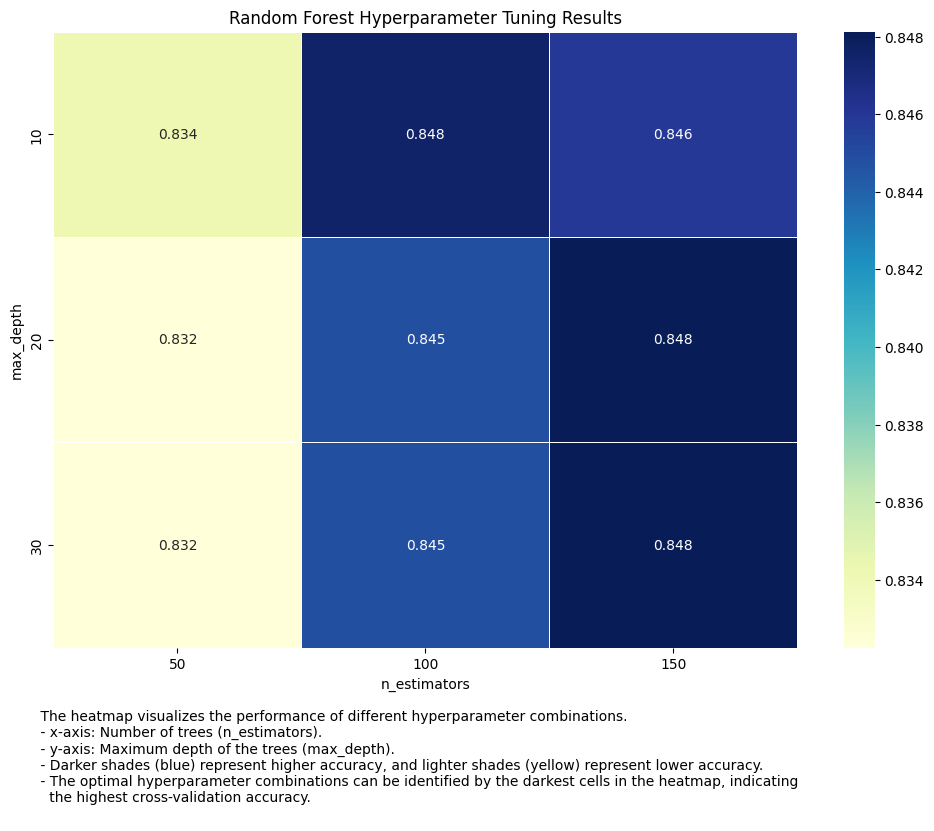


Final Cross-Validation Accuracy: 0.8746160794941285


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Perform hyperparameter tuning on the best model and visualize results
def hyperparameter_tuning(best_model_name, X, y):
    if best_model_name == 'Random Forest':
        best_model = RandomForestClassifier(random_state=42)
        tuning_params = {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif best_model_name == 'KNN':
        best_model = KNeighborsClassifier()
        tuning_params = {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    elif best_model_name == 'SVM':
        best_model = SVC(random_state=42, probability=True)
        tuning_params = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    elif best_model_name == 'Logistic Regression':
        best_model = LogisticRegression(random_state=42)
        tuning_params = {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'saga']
        }

    grid_search = GridSearchCV(estimator=best_model, param_grid=tuning_params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)

    # Best hyperparameters output
    print("\nBest Hyperparameters:")
    print(grid_search.best_params_)

    # Extract and display accuracies in a table
    results_df = pd.DataFrame(grid_search.cv_results_)
    accuracies_table = results_df[['param_max_depth', 'param_n_estimators', 'mean_test_score']]
    accuracies_table = accuracies_table.rename(columns={
        'param_max_depth': 'Max Depth',
        'param_n_estimators': 'Number of Trees (n_estimators)',
        'mean_test_score': 'Accuracy'
    })

    print("\nAccuracy Table:")
    print(accuracies_table)

    # Visualization of hyperparameter tuning results
    plt.figure(figsize=(12, 8))
    sns.heatmap(results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score'),
                annot=True, cmap="YlGnBu", fmt=".3f", linewidths=0.5)
    plt.title(f"{best_model_name} Hyperparameter Tuning Results")
    plt.xlabel('n_estimators')
    plt.ylabel('max_depth')

    # Adding explanation text below the graph
    explanation_text = """
    The heatmap visualizes the performance of different hyperparameter combinations.
    - x-axis: Number of trees (n_estimators).
    - y-axis: Maximum depth of the trees (max_depth).
    - Darker shades (blue) represent higher accuracy, and lighter shades (yellow) represent lower accuracy.
    - The optimal hyperparameter combinations can be identified by the darkest cells in the heatmap, indicating
      the highest cross-validation accuracy.
    """
    plt.figtext(0.1, -0.1, explanation_text, wrap=True, horizontalalignment='left', fontsize=10)

    plt.show()

    return grid_search.best_estimator_

# Example usage for Random Forest
best_model_name = 'Random Forest'  # Example best model
best_model = hyperparameter_tuning(best_model_name, X_pca, y_pca)

# Display final tuned model performance
final_scores = cross_val_score(best_model, X_pca, y_pca, cv=5, scoring='accuracy')
print("\nFinal Cross-Validation Accuracy:", np.mean(final_scores))


In [9]:
import joblib

# Save the best model
def save_best_model(best_model, model_name):
    # Save the model to a file
    filename = f"{model_name}_best_model.pkl"
    joblib.dump(best_model, filename)
    print(f"Best model saved as {filename}")

# Example usage after hyperparameter tuning
save_best_model(best_model, best_model_name)


Best model saved as Random Forest_best_model.pkl
